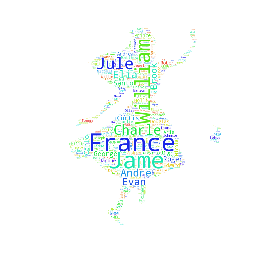

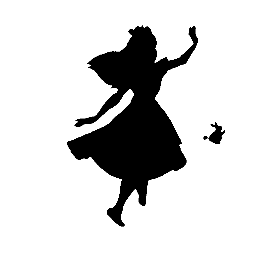

In [6]:
"""
Masked wordcloud
================
Using a mask you can generate wordclouds in arbitrary shapes.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Read the whole text.
text = open('NationalNames.csv').read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open("alice_mask.png"))

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=STOPWORDS.add("said"))
# generate word cloud
wc.generate(text)

# store to file
wc.to_file("alice.png")

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>


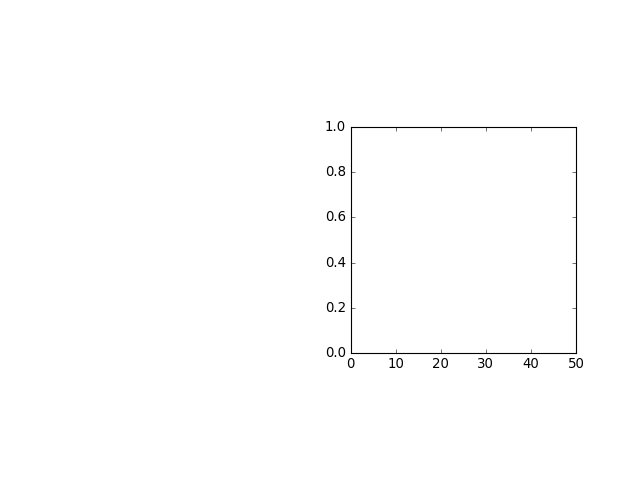

In [3]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.collections import PatchCollection
from random import *

# UNCOMMENT THE LINE BELOW FOR THE BACKEND YOU WANT TO TRY, THEN RESTART THE KERNEL AND EXECUTE THIS INPUT CELL
# If you leave all of the lines commented, the default backend will be used depending on your operating system

#plt.switch_backend('qt4agg')
#plt.switch_backend('tkagg')
plt.switch_backend('nbagg')
#%matplotlib inline


nx = 20     # x size of lattice
ny = 20     # y size of lattice

pAds = 0.01     # adsorption probability per time step
pDes = 0.0075   # desorption probability per time step

tMax = 50     # number of time steps

surface = np.zeros((nx,ny))              # create surface
xc = [0]
yc = [0]


# initialization and time step of simulation

patches = []

def init():
    global patches
    if patches:
        # prevent the second call of the init()
        return patches
    # initialize an empty list of circles
    for x in range(nx):
        for y in range(ny):
            if(surface[x][y] == 0):
                patches.append(ax_surf.add_patch(plt.Circle((x+0.5,y+0.5),0.45,color='w')))
    lines, = ax_covr.plot([],[])
    patches.append(lines)
    return patches

def animate(i): 
    global patches
    idx = 0
    for x in range(nx):
        for y in range(ny):
            if surface[x][y] == 0:
                if random() < pAds:
                    surface[x][y] = 1
                    patches[idx] = ax_surf.add_patch(plt.Circle((x+0.5,y+0.5),0.45,color='b'))
            else:
                if(random()<pDes):
                    surface[x][y] = 0
                    patches[idx] = ax_surf.add_patch(plt.Circle((x+0.5,y+0.5),0.45,color='w'))
            idx += 1
    coverage = np.sum(surface)/(nx*ny)
    xc.append(i)
    yc.append(coverage)
    lines, = ax_covr.plot(xc,yc,'ro',ms=2,lw=0)
    patches[idx] = lines
    return patches

# set up figure and animate

fig = plt.figure()
ax_surf = plt.subplot2grid((1, 2), (0, 0))
ax_covr = plt.subplot2grid((1, 2), (0, 1))
ax_surf.set_xlim(0,nx)
ax_surf.set_ylim(0,ny)
ax_covr.set_xlim(0,tMax)
ax_covr.set_ylim(0,1)

ax_surf.set_aspect(1)
ax_surf.axis('off')

ax_covr.set_aspect(tMax)

ax_surf.hold(False)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=tMax, interval=0, blit=True,repeat=False)
plt.show()